In [5]:
from functions import *
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import *
from datetime import datetime

41 41
41 41


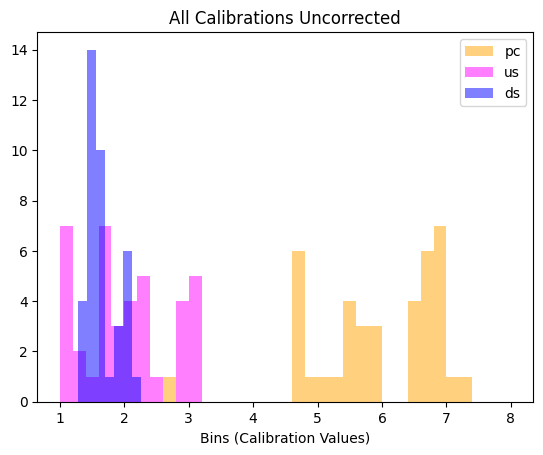

In [6]:
newCalibrations=np.load('EPRArray/EPRCalibrationsV3.npy',allow_pickle=True)
fits=np.load('NMRDataFits/FitsInRange.npy')
settings=np.load('NMRDataSettings/SettingsInRange.npy')
indicesInRange,datesInRange = DatesInRange('20211214_150000','20221216_120200')

pc=np.empty(0)
us=np.empty(0)
ds=np.empty(0)

for i in range(0,len(newCalibrations)):
    pc=np.append(pc,newCalibrations[i][1]*.9)
    us=np.append(us,newCalibrations[i][2]*.9)
    ds=np.append(ds,newCalibrations[i][3]*.9)

#using the correct %/khz value for each cell
us=us*.6401/.6604
us[32:38]*=.6604/.6401
ds=ds*.6401/.6604
ds[32:38]*=.6604/.6401
pc=pc*.6401/.6604
pc[32:38]*=.6604/.6401
print(len(ds),len(us))
x=np.where(us!=0)
# us=us[np.where(us!=0)]
# ds=ds[np.where(ds!=0)]
# pc=pc[np.where(pc!=0)]

# print(len(ds),len(us))


# u, i = np.unique(pc, return_index=True)
# si = np.sort(i)
# pc = pc[si]

# u, i = np.unique(ds, return_index=True)
# si = np.sort(i)
# ds = ds[si]

# u, i = np.unique(us, return_index=True)
# si = np.sort(i)
# us = us[si]
print(len(ds),len(us))

#newCalibrations=newCalibrations[x]
#newCalibrations=newCalibrations[si]
binN=35
x1,y,z=plt.hist(pc,range=(1,8),bins=binN,label='pc',alpha=.5,color='orange')
x2,y,z=plt.hist(us,range=(1,8),bins=binN,label='us',alpha=.5,color='magenta')
x3,y,z=plt.hist(ds,range=(1,8),bins=binN+15,label='ds',alpha=.5,color='blue')
plt.legend(loc='upper right')
plt.title('All Calibrations Uncorrected')
plt.xlabel('Bins (Calibration Values)')


hunterKin2DS=ds[:21]
hunterKin2US=us[:21]
hunterKin2PC=pc[:21]
hunterKin2Calibrations=newCalibrations[:21]

windmillKin3DS=ds[21:28]
windmillKin3US=us[21:28]
windmillKin3PC=pc[21:28]
windmillKin3Calibrations=newCalibrations[21:28]

hunterKin3DS=ds[28:]
hunterKin3US=us[28:]
hunterKin3PC=pc[28:]
hunterKin3Calibrations=newCalibrations[28:]

In [7]:
len(hunterKin3DS)

13

In [8]:
len(ds)

41

In [9]:
len(us)

41

In [10]:
len(newCalibrations)

41

In [11]:
newCalibrations[20]

array([11030356, 6.3205, 2.0307, 1.6408,
       array([ 16.9189,  16.9482,  33.7549,  32.1094, 249.7537, 239.562 ,
               38.0371,  65.3516])                                       ,
       array([ 16.9189,  16.9482,  34.2871,  32.417 , 254.0164, 241.038 ,
               38.4961,  50.0293])                                       ],
      dtype=object)

In [12]:
newCalibrations[:21][-1:]

array([[11030356, 6.3205, 2.0307, 1.6408,
        array([ 16.9189,  16.9482,  33.7549,  32.1094, 249.7537, 239.562 ,
                38.0371,  65.3516])                                       ,
        array([ 16.9189,  16.9482,  34.2871,  32.417 , 254.0164, 241.038 ,
                38.4961,  50.0293])                                       ]],
      dtype=object)

In [13]:
pc

array([2.79897392, 5.17242284, 5.29611994, 6.41558738, 7.23697797,
       6.95050317, 5.89445448, 5.95464559, 5.71876622, 5.74406394,
       5.76020213, 7.02212187, 5.90692887, 0.        , 6.60462236,
       0.        , 6.99289865, 6.74663849, 6.48144867, 6.7148855 ,
       5.51359304, 5.51359304, 5.47006353, 5.45471043, 4.71226616,
       4.81607402, 4.74899146, 4.79138694, 4.78056998, 4.74960209,
       4.76321052, 6.6784219 , 6.86925   , 6.93459   , 6.86691   ,
       6.83127   , 6.88878   , 6.78492   , 6.57522467, 6.62224353,
       6.49121882])

In [14]:
np.where(pc<4)

(array([ 0, 13, 15]),)

In [15]:
newCalibrations[0]

array([10201910, 3.2086, 1.4316, 1.4996,
       array([ 32.4316,  43.6719,  43.1006,  29.4531, 251.2505, 203.511 ,
               32.1582,  33.54  ])                                       ,
       array([ 21.792 ,  43.6719,  43.1006,  30.0195, 248.143 , 239.684 ,
               31.2695,  33.7305])                                       ],
      dtype=object)

### Dates for Each Group


In [16]:
HunterKin2Fits=np.transpose(np.load('NMRDataFits/HunterKin2.npy'))
WindmillKin3Fits=np.transpose(np.load('NMRDataFits/Windmill.npy'))
HunterKin3Fits=np.transpose(np.load('NMRDataFits/HunterKin3.npy'))


In [17]:
mySettings=settings
dates=mySettings[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
mySettingsOrdered = np.transpose(np.take(mySettings, index_array, axis=0))

In [18]:
#mySettingsOrdered[0].astype(int).astype(str)

In [19]:
myFits=HunterKin2Fits
dates=myFits[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
HunterKin2FitsOrdered = np.transpose(np.take(myFits, index_array, axis=0))

pc=HunterKin2FitsOrdered[1]
ds=HunterKin2FitsOrdered[3]

ratio3=pc/ds
indices=np.empty(0)
junk = np.logical_or(np.isnan(ratio3), np.isinf(ratio3))
filteredRatio3=ratio3[~junk]

myFits=HunterKin3Fits
dates=myFits[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
HunterKin3FitsOrdered = np.transpose(np.take(myFits, index_array, axis=0))

pc=HunterKin3FitsOrdered[1]
ds=HunterKin3FitsOrdered[3]

ratio3=pc/ds
indices=np.empty(0)
junk = np.logical_or(np.isnan(ratio3), np.isinf(ratio3))
filteredRatio3=ratio3[~junk]

myFits=WindmillKin3Fits
dates=myFits[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
WindmillKin3FitsOrdered = np.transpose(np.take(myFits, index_array, axis=0))

pc=WindmillKin3FitsOrdered[1]
ds=WindmillKin3FitsOrdered[3]

ratio3=pc/ds
indices=np.empty(0)
junk = np.logical_or(np.isnan(ratio3), np.isinf(ratio3))
filteredRatio3=ratio3[~junk]

/tmp/ipykernel_11887/2953280810.py:12: RuntimeWarning: invalid value encountered in divide
  ratio3=pc/ds
/tmp/ipykernel_11887/2953280810.py:44: RuntimeWarning: invalid value encountered in divide
  ratio3=pc/ds


In [20]:
HunterKin2Calibrations=newCalibrations[:21]
WindmillKin3Calibrations=newCalibrations[21:28]
HunterKin3Calibrations=newCalibrations[28:]

In [21]:
len(HunterKin3Calibrations)

13

In [22]:
dateList=np.empty(0)
settingsList=np.empty(0)
HunterKin2RatioB=np.empty(0)
HunterKin2RatioA=np.empty(0)

for i in range(0,len(HunterKin2FitsOrdered[0])):
    dateList=np.append(dateList,str(int(HunterKin2FitsOrdered[0][i]))[:8]+'_'+str(int(HunterKin2FitsOrdered[0][i]))[8:])
    #settingsList=np.append(settingsList,str(int(mySettingsOrdered[0][i]))[:8]+'_'+str(int(mySettingsOrdered[0][i]))[8:])
for i in range(0,len(HunterKin2Calibrations)):
    b,a=FindNMRsB4andAft('2022'+str(HunterKin2Calibrations[i][0]),dateList)
    #print(i)
    HunterKin2RatioB=np.append(HunterKin2RatioB,HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    #print(HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    HunterKin2RatioA=np.append(HunterKin2RatioA,HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])
    #print(HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])
dateList=np.empty(0)
WindmillKin3RatioB=np.empty(0)
WindmillKin3RatioA=np.empty(0)

for i in range(0,len(WindmillKin3FitsOrdered[0])):
    dateList=np.append(dateList,str(int(WindmillKin3FitsOrdered[0][i]))[:8]+'_'+str(int(WindmillKin3FitsOrdered[0][i]))[8:])
for i in range(0,len(WindmillKin3Calibrations)):
    b,a=FindNMRsB4andAft('2022'+str(WindmillKin3Calibrations[i][0]),dateList)
    WindmillKin3RatioB=np.append(WindmillKin3RatioB,WindmillKin3FitsOrdered[1][b]/WindmillKin3FitsOrdered[3][b])
    #print(WindmillKin3FitsOrdered[1][b]/WindmillKin3FitsOrdered[3][b])
    WindmillKin3RatioA=np.append(WindmillKin3RatioA,WindmillKin3FitsOrdered[1][a]/WindmillKin3FitsOrdered[3][a])
    
dateList=np.empty(0)
HunterKin3RatioB=np.empty(0)
HunterKin3RatioA=np.empty(0)

for i in range(0,len(HunterKin3FitsOrdered[0])):
    dateList=np.append(dateList,str(int(HunterKin3FitsOrdered[0][i]))[:8]+'_'+str(int(HunterKin3FitsOrdered[0][i]))[8:])
for i in range(0,len(HunterKin3Calibrations)):
    b,a=FindNMRsB4andAft('2022'+str(HunterKin3Calibrations[i][0]),dateList)
    HunterKin3RatioB=np.append(HunterKin3RatioB,HunterKin3FitsOrdered[1][b]/HunterKin3FitsOrdered[3][b])
    #print(HunterKin3FitsOrdered[1][b]/HunterKin3FitsOrdered[3][b])
    HunterKin3RatioA=np.append(HunterKin3RatioA,HunterKin3FitsOrdered[1][a]/HunterKin3FitsOrdered[3][a])






/tmp/ipykernel_11887/35411361.py:24: RuntimeWarning: invalid value encountered in divide
  WindmillKin3RatioB=np.append(WindmillKin3RatioB,WindmillKin3FitsOrdered[1][b]/WindmillKin3FitsOrdered[3][b])


In [23]:
len(HunterKin3RatioB)

13

# Histograms

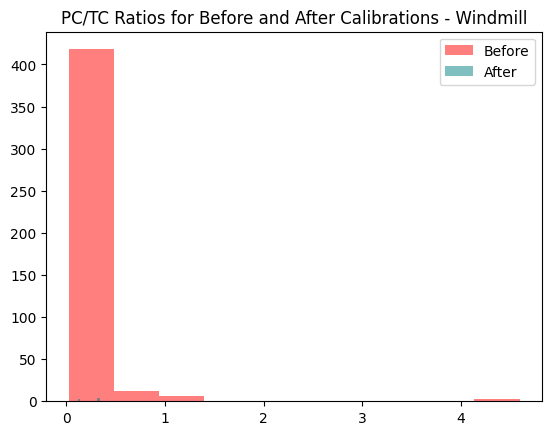

In [24]:
plt.hist(WindmillKin3RatioB,alpha=.5,color='red',label='Before')
plt.hist(WindmillKin3RatioA,alpha=.5,color='teal',label='After')
plt.title('PC/TC Ratios for Before and After Calibrations - Windmill')
plt.legend(loc='upper right')

In [25]:
HunterKin2RatioA

array([2.25983346, 0.32592303, 0.30026841, 0.22608617, 0.23567023,
       0.23580663, 0.32286248, 0.24994524, 0.23989407, 0.24231441,
       0.24604902, 0.22593353, 0.24786205, 0.22223196, 0.23670091,
       0.23634748, 0.21214241, 0.22435708, 0.22864086, 0.22597485,
       0.25836611])

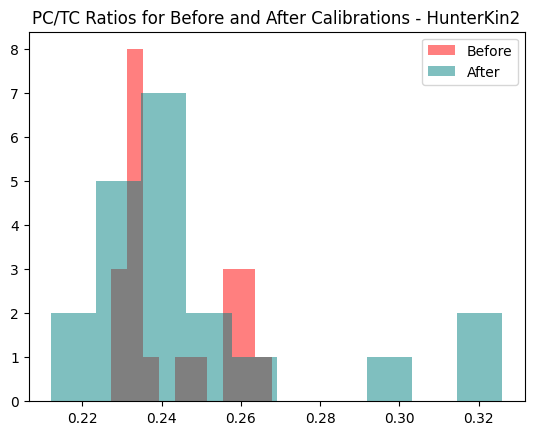

In [26]:
plt.hist(HunterKin2RatioB,alpha=.5,color='red',label='Before')
plt.hist(HunterKin2RatioA[1:],alpha=.5,color='teal',label='After')
plt.title('PC/TC Ratios for Before and After Calibrations - HunterKin2')
plt.legend(loc='upper right')

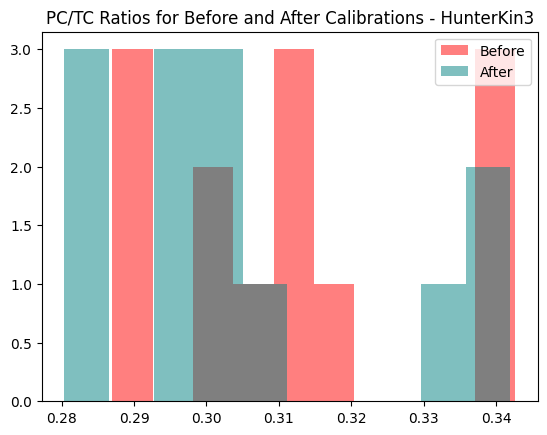

In [27]:
plt.hist(HunterKin3RatioB,alpha=.5,color='red',label='Before')
plt.hist(HunterKin3RatioA,alpha=.5,color='teal',label='After')
plt.title('PC/TC Ratios for Before and After Calibrations - HunterKin3')
plt.legend(loc='upper right')

# Mimic Spreadsheet

## Hunter Kin2

In [28]:
C2=306.1659 #V_PC
C3=44.8700 #V_TT
C4=160.9000 #V_TC
C6=878.7170 #kHz/Gauss
C7=4.8376 #cbar/(kHz/G)
F2=7.38658534932298 #Fill Density
F3=265 #ref. T_pc
F4=31.5 #ref. T_tc
F5=.3153 #ref_ratio

In [29]:
I2=C2*(F4+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_pc
I3=(C4+C3)*(F3+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_tc
print('This better be 1.0 --> ',I2+I3)

This better be 1.0 -->  1.0


In [30]:
 #T_pc
N=np.empty(0)
O=np.empty(0)
for i in range(0,len(HunterKin2RatioB)):
    N=np.append(N,(F5/HunterKin2RatioB[i])*F3)
    O=np.append(O,F4)
    
#N=np.empty(0)
#O=np.empty(0)
#for i in range(0,len(HunterKin3RatioB)):
#    N=np.append(N,(F5/HunterKin3RatioB[i])*F3)
#    O=np.append(O,F4)
    
# N=np.empty(0)
# O=np.empty(0)
# for i in range(0,len(WindmillKin3RatioB)):
#     N=np.append(N,(F5/WindmillKin3RatioB[i])*F3)
#     O=np.append(O,F4)

In [31]:
# #alpha
R=np.empty(0)
for i in range(0,len(HunterKin2RatioB)):
    R=np.append(R,1/((F5/HunterKin2RatioB[i])*(1-I2)+I2))
    
#R=np.empty(0)
#for i in range(0,len(HunterKin3RatioB)):
#    R=np.append(R,1/((F5/HunterKin3RatioB[i])*(1-I2)+I2))
    
# R=np.empty(0)
# for i in range(0,len(WindmillKin3RatioB)):
#     R=np.append(R,1/((F5/WindmillKin3RatioB[i])*(1-I2)+I2))

In [32]:
# #beta
S=np.empty(0)
for i in range(0,len(HunterKin2RatioB)):
    S=np.append(S,(F5/HunterKin2RatioB[i])/((F5/HunterKin2RatioB[i])*I3+1-I3))
    
#S=np.empty(0)
#for i in range(0,len(HunterKin3RatioB)):
#    S=np.append(S,(F5/HunterKin3RatioB[i])/((F5/HunterKin3RatioB[i])*I3+1-I3))
    
# S=np.empty(0)
# for i in range(0,len(WindmillKin3RatioB)):
#     S=np.append(S,(F5/WindmillKin3RatioB[i])/((F5/WindmillKin3RatioB[i])*I3+1-I3))

In [33]:
len(S)

21

In [34]:
len(WindmillKin3RatioB)

442

In [35]:
# #f_pc
T=np.empty(0)
for i in range(0,len(HunterKin2RatioB)):
    T=np.append(T,R[i]*I2)
    
#T=np.empty(0)
#for i in range(0,len(HunterKin3RatioB)):
#    T=np.append(T,R[i]*I2)
    
# T=np.empty(0)
# for i in range(0,len(WindmillKin3RatioB)):
#     T=np.append(T,R[i]*I2)

In [36]:
# #f_tc
U=np.empty(0)
for i in range(0,len(HunterKin2RatioB)):
    U=np.append(U,S[i]*I3)
    
#U=np.empty(0)
#for i in range(0,len(HunterKin3RatioB)):
#    U=np.append(U,S[i]*I3)
    
# U=np.empty(0)
# for i in range(0,len(WindmillKin3RatioB)):
#     U=np.append(U,S[i]*I3)

In [37]:
len(windmillKin3DS)

7

In [38]:
len(hunterKin3DS)

13

In [39]:
adjDS=hunterKin2DS*S
adjUS=hunterKin2US*S
adjPC=hunterKin2PC*R

#adjDS=hunterKin3DS*S
#adjUS=hunterKin3US*S
#adjPC=hunterKin3PC*R

# adjDS=windmillKin3DS*S
# adjUS=windmillKin3US*S
# adjPC=windmillKin3PC*R

In [58]:
adjDS

array([1.44399329, 1.60708903, 1.59922041, 1.66673852, 1.92685974,
       1.85058792, 1.89757145, 1.64831024, 1.55297868, 1.56573247,
       1.58409563, 1.82888009, 1.62747429, 1.76163428, 1.76147595,
       1.75199821, 1.69985222, 1.74756429, 1.55383885])

DS, US, PC, std:  46.241 , 33.39751 , 35.995


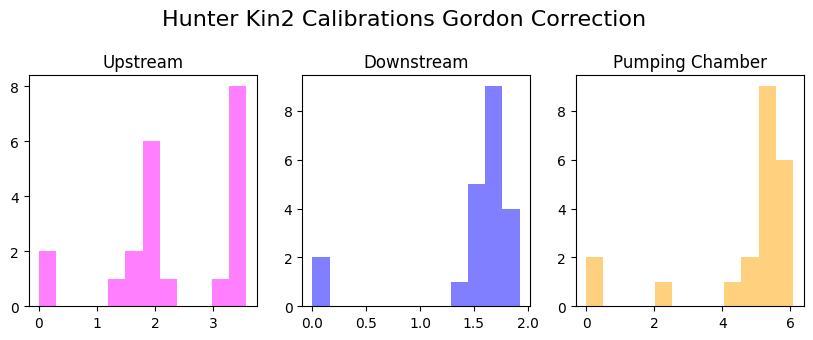

In [41]:
usSig=np.std(adjUS)/np.mean(adjUS)
dsSig=np.std(adjDS)/np.mean(adjDS)
pcSig=np.std(adjPC)/np.mean(adjPC)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
ax1.hist(adjUS,bins=12,color='magenta',alpha=.5,label='us')
ax2.hist(adjDS,bins=12,color='blue',alpha=.5,label='ds')
ax3.hist(adjPC,bins=12,color='orange',alpha=.5,label='pc')

# Set the titles for the histograms
plt.suptitle('Hunter Kin2 Calibrations Gordon Correction', fontsize=16,y=1.10)

ax1.set_title("Upstream")
ax2.set_title("Downstream")
ax3.set_title("Pumping Chamber")
print('DS, US, PC, std: ',np.round(usSig*100,3),',',np.round(100*dsSig,5),',',np.round(100*pcSig,3))

0.3339751222172616

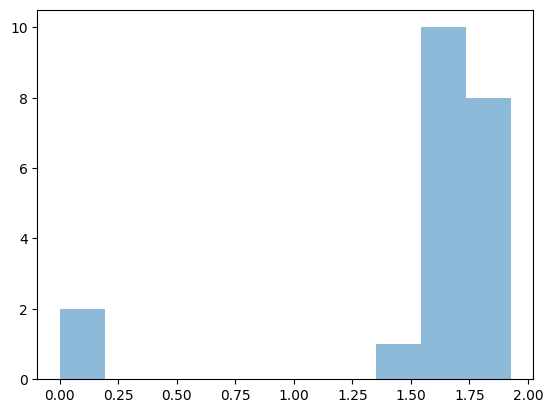

In [42]:
plt.hist(adjDS,alpha=.5)
np.std(adjDS)/np.mean(adjDS)


0.3319876142280385

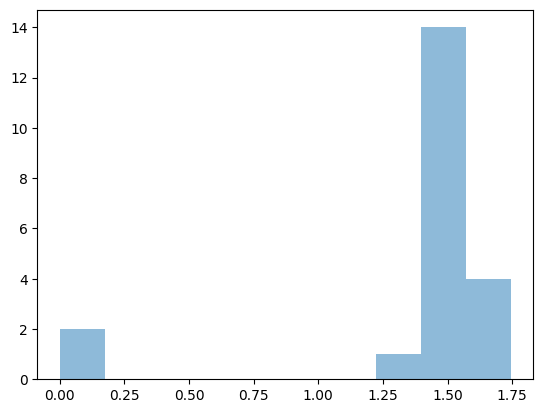

In [43]:
plt.hist(hunterKin2DS,alpha=.5)
np.std(hunterKin2DS)/np.mean(hunterKin2DS)

In [45]:
np.mean(hunterKin2DS)

1.369815107726919

In [47]:
hunterKin2DS=hunterKin2DS[hunterKin2DS!=0]

In [51]:
mean=np.mean(hunterKin2DS)

In [52]:
std=np.std(hunterKin2DS)

In [53]:
100*std/mean

6.693982515082139

In [55]:
adjDS=adjDS[adjDS!=0]

In [56]:
mean=np.mean(adjDS)
std=np.std(adjDS)

In [59]:
mean

1.688205029892168

In [57]:
100*std/mean

7.535574770022579